# SUMMARY, HOW IT IS DONE
1. get data set
2. get some quick info using pd.head(), pd.summary(), pd.info()
3. visualise the data as much as possible
4. get rid of missing values, or not needed ones, fix  categorical columns with text
5. divide into train and test set
  - stratified mix (if small data set), mixes and keeps the right mixing order
  - mix just randomly - for big datasets
6. scale features - normalisation, standardisation
7. select and train models
8. evaluate (using cross validation?)
9. fine tune models



# CHECK VERSIONS OF LIBRARIES

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
import pandas as pd
import sklearn

print("numpy version: ", np.__version__)
print("matplotlib version: ", mpl.__version__)
print("pandas version: ", pd.__version__)
print("sklearn version: ", sklearn.__version__)


numpy version:  1.24.4
matplotlib version:  3.8.2
pandas version:  2.1.3
sklearn version:  1.3.2


In [165]:
# import custom module to separate text in console
from separator import SeparateText

s = SeparateText()

# LOAD THE DATA AND DO SOME QUICK CHECKING


In [166]:
def load_data(path_or_url: str):
    """
    load data from path or url
    :param path_or_url: 
    :return: Pandas DataFrame
    """
    return pd.read_csv(path_or_url)


housing_dataset = load_data(
    path_or_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
)

# show first 5 rows
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# SHOW SOME INFO ABOUT DATASET

In [167]:
# - check for missing values like 20640 vs 2433, etc...
# - check for d-types - ocean proximity is not number
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [168]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


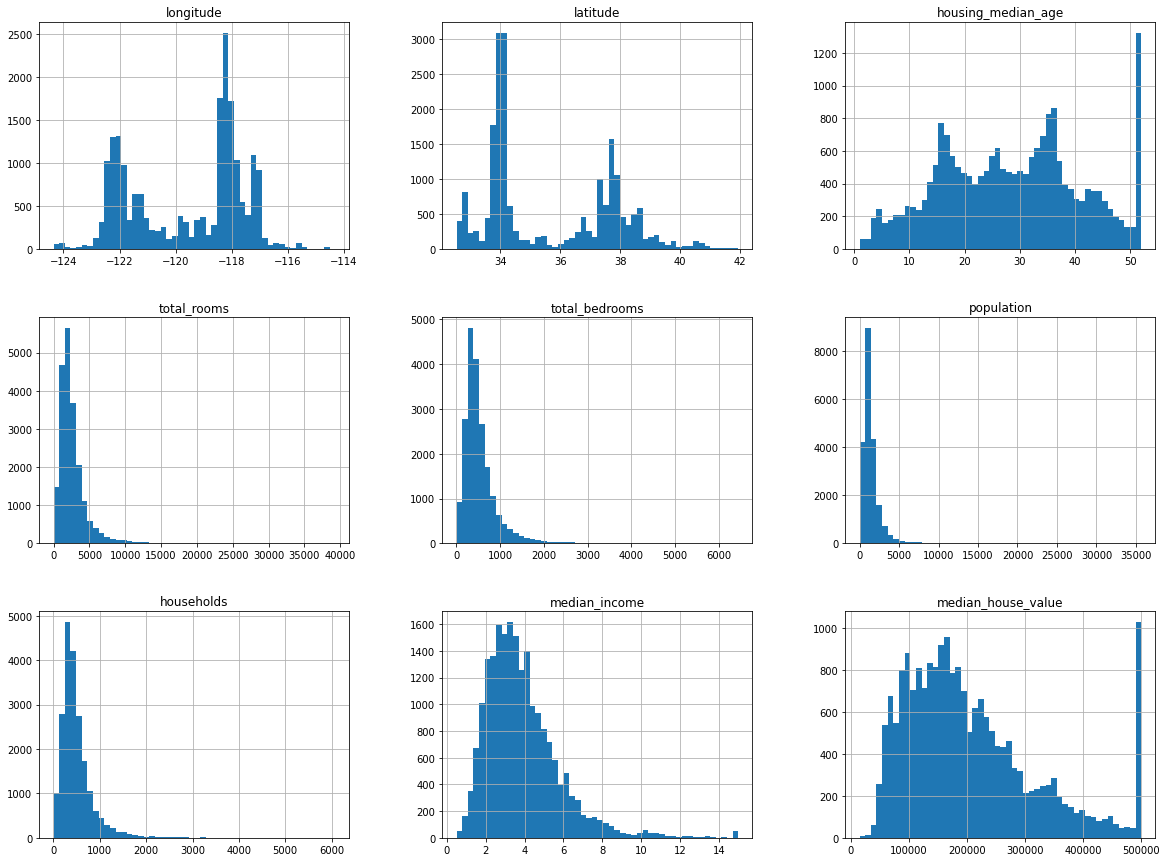

In [169]:
# a histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis)
housing_dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [170]:
# see that ocean proximity can be actually categorical because many values repeat
housing_dataset["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [171]:
from sklearn.model_selection import train_test_split


# split to train and test set
# print statements inside are only just for better understanding of what is happening
def split_train_test(data: pandas.DataFrame, test_ratio: float):
    """
    split data into train and test set
    :param data: pandas DataFrame
    :param test_ratio: float
    :return: train set, test set
    """
    np.random.seed(42)
    # permutation shuffles the data se the print statement below will show different order of letters
    shuffled_indices = np.random.permutation(len(data))
    print(f"{np.random.permutation(['a', 'b', 'c', 'd', 'e'])=}")

    # split the data into two sets using list slicing
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    # visualise the data
    print(f"{len(shuffled_indices)=}")
    print(f"{test_set_size=}")
    print(f"{len(test_indices)=}")
    print(f"{len(train_indices)=}")

    # iloc locates data by index in pandas
    return data.iloc[train_indices], data.iloc[test_indices]


# call the function just for visualisation of printed statements. The function is not used in the rest of the code
split_train_test(housing_dataset, 0.2)

# split the complete dataset on the train data and test data
# this is sickit learn version of custom function above
train_set, test_set = train_test_split(housing_dataset, test_size=0.2, random_state=42)



np.random.permutation(['a', 'b', 'c', 'd', 'e'])=array(['d', 'b', 'a', 'e', 'c'], dtype='<U1')
len(shuffled_indices)=20640
test_set_size=4128
len(test_indices)=4128
len(train_indices)=16512


In [172]:
print("number of rows & number of columns", train_set.shape)
print("number of rows & number of columns", test_set.shape)

number of rows & number of columns (16512, 10)
number of rows & number of columns (4128, 10)


In [173]:
housing_dataset["median_income"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


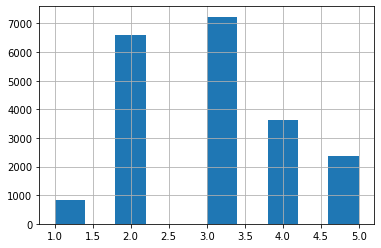

In [174]:
# pd.cut is used to group into categories (could convert ages to groups of age ranges)

# as shown on histogram above, most values are between 1,5 and 6
# bins are here as 5 section, starting with 0-1,5 (0-15000$), etc...
# labels are values the dataset is going to be changed to
housing_dataset["income_cat"] = pd.cut(housing_dataset["median_income"],
                                       bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                       labels=[1, 2, 3, 4, 5])
# now the data are labeled into 5 categories
print(housing_dataset["income_cat"].head())
housing_dataset["income_cat"].hist()
plt.show()

# STRATIFY THE DATA
Stratify data to make sure that the train and test set have the same ratio of instances across all cataegories.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [175]:
from sklearn.model_selection import StratifiedShuffleSplit

# X - target dataset to be stratified
# y - dataset based on X will be stratified (in this case by income_cat)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
generator_ = stratified_split.split(X=housing_dataset, y=housing_dataset["income_cat"])
train_index, test_index = next(generator_)

# seems this will move the rows based on the position of the old index on the new index. Meaning if old row number 4000 (was previously on index 4000) is now on index 0, it will be moved to index 0 in the new dataset. I can be wrong here, but it seems like it.
strat_train_set = housing_dataset.loc[train_index]  # check the data in cells below
strat_test_set = housing_dataset.loc[test_index]  # check the data in cells below
print(f"{train_index=}\n" + s.separator())
print(f"{test_index=}\n" + s.separator())

train_index=array([12655, 15502,  2908, ..., 19263, 19140, 19773], dtype=int64)
[1] -------------------------------------------------------------------------------

test_index=array([ 5241, 17352,  3505, ..., 17223, 10786,  3965], dtype=int64)
[2] -------------------------------------------------------------------------------


In [176]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [177]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3


In [178]:
# compare how the stratification kept the ratios of income categories
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [179]:
# see that on average the ratios are the same with original dataset, which is what we want. What we want is to have the same ratios of income categories in both datasets (train and test)
housing_dataset["income_cat"].value_counts() / len(housing_dataset)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [180]:
# Seems that income category was created previously mainly as a key for stratification. Now it is not needed anymore and can be dropped
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [181]:
print(f"{strat_train_set.shape=}")
print(f"{strat_test_set.shape=}")

strat_train_set.shape=(16512, 10)
strat_test_set.shape=(4128, 10)


In [182]:
# stratification does not have any impact on the actual values between original data set and stratified dataset, it distributes data between test and train set with the right split. Check the those 2 cells below, they are the same still.
housing_dataset.iloc[5241]

longitude               -118.39
latitude                  34.12
housing_median_age         29.0
total_rooms              6447.0
total_bedrooms           1012.0
population               2184.0
households                960.0
median_income            8.2816
median_house_value     500001.0
ocean_proximity       <1H OCEAN
income_cat                    5
Name: 5241, dtype: object

In [183]:
strat_test_set.iloc[0]

longitude               -118.39
latitude                  34.12
housing_median_age         29.0
total_rooms              6447.0
total_bedrooms           1012.0
population               2184.0
households                960.0
median_income            8.2816
median_house_value     500001.0
ocean_proximity       <1H OCEAN
Name: 5241, dtype: object

# VISUALISE THE DATA

<Axes: xlabel='longitude', ylabel='latitude'>

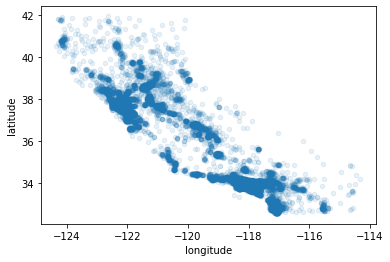

In [184]:
# create a copy of dataset to play with using visualisations
strat_train_features = strat_train_set.copy()

# plotting of pandas dataframe
strat_train_features.plot(kind="scatter",
                          x="longitude",
                          y="latitude",
                          alpha=0.1)  # alpha to visualise better density of points (from 0.0 to 1.0)

<Axes: xlabel='longitude', ylabel='latitude'>

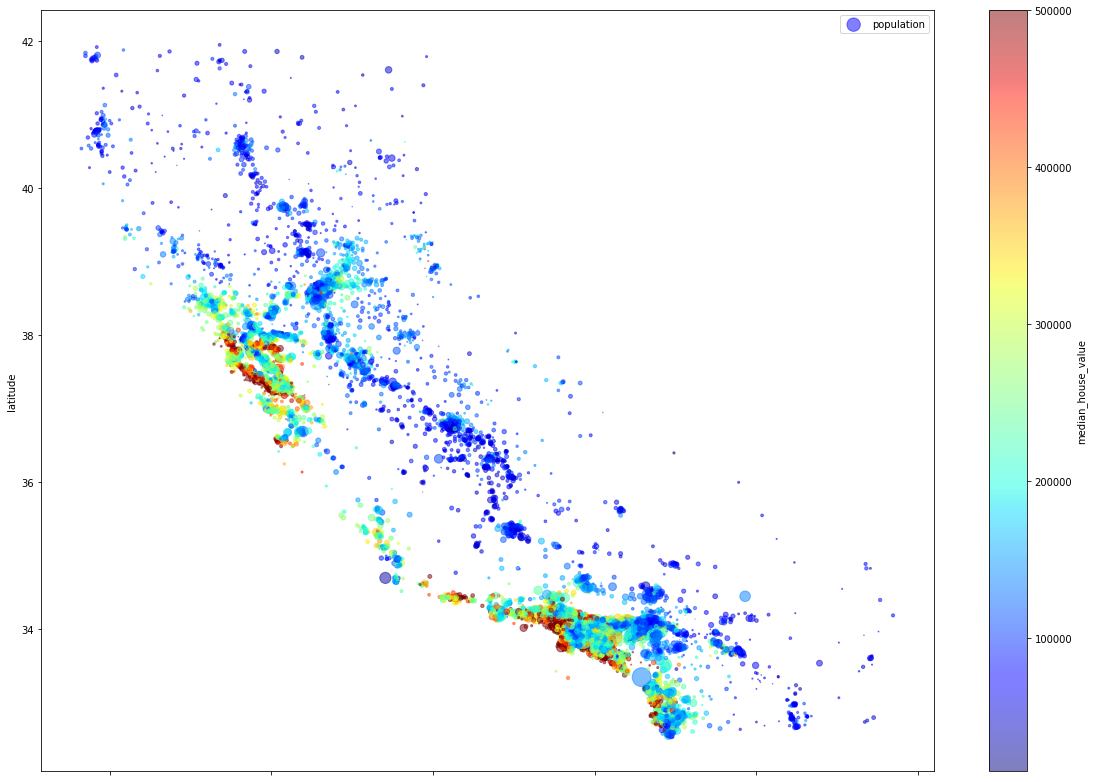

In [185]:
strat_train_features.plot(
    kind="scatter",  # type of graph
    x="longitude",  # x axis
    y="latitude",  # y axis
    alpha=0.5,  # described in one cell above
    s=strat_train_features["population"] / 100,  # size of the circle based on population
    label="population",  # label in right corner
    figsize=(20, 14),  # size of image
    c="median_house_value",  # color palette based on median house value
    cmap="jet",  # select color map
    colorbar=True,  # that scale on the right
    legend=True  # population
)

# LOOKING FOR CORRELATIONS
DataFrame.cor(): Compute pairwise correlation of columns, excluding NA/null values.

In [186]:
# it is possible to check only linear correlations and only numerical values. Therefore, ocean proximity has to be dropped
housing_features_numeric = strat_train_features.drop(
    columns=["ocean_proximity"],
    axis=1
)
correlation_matrix = housing_features_numeric.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

# see that below we see positive correlation between median house value and median income. Number closer to 1 means stronger correlation. Negative number means negative correlation. This means that median house value is negativly corelated with latitude (meaning the more north you go, the lower the median house value is)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

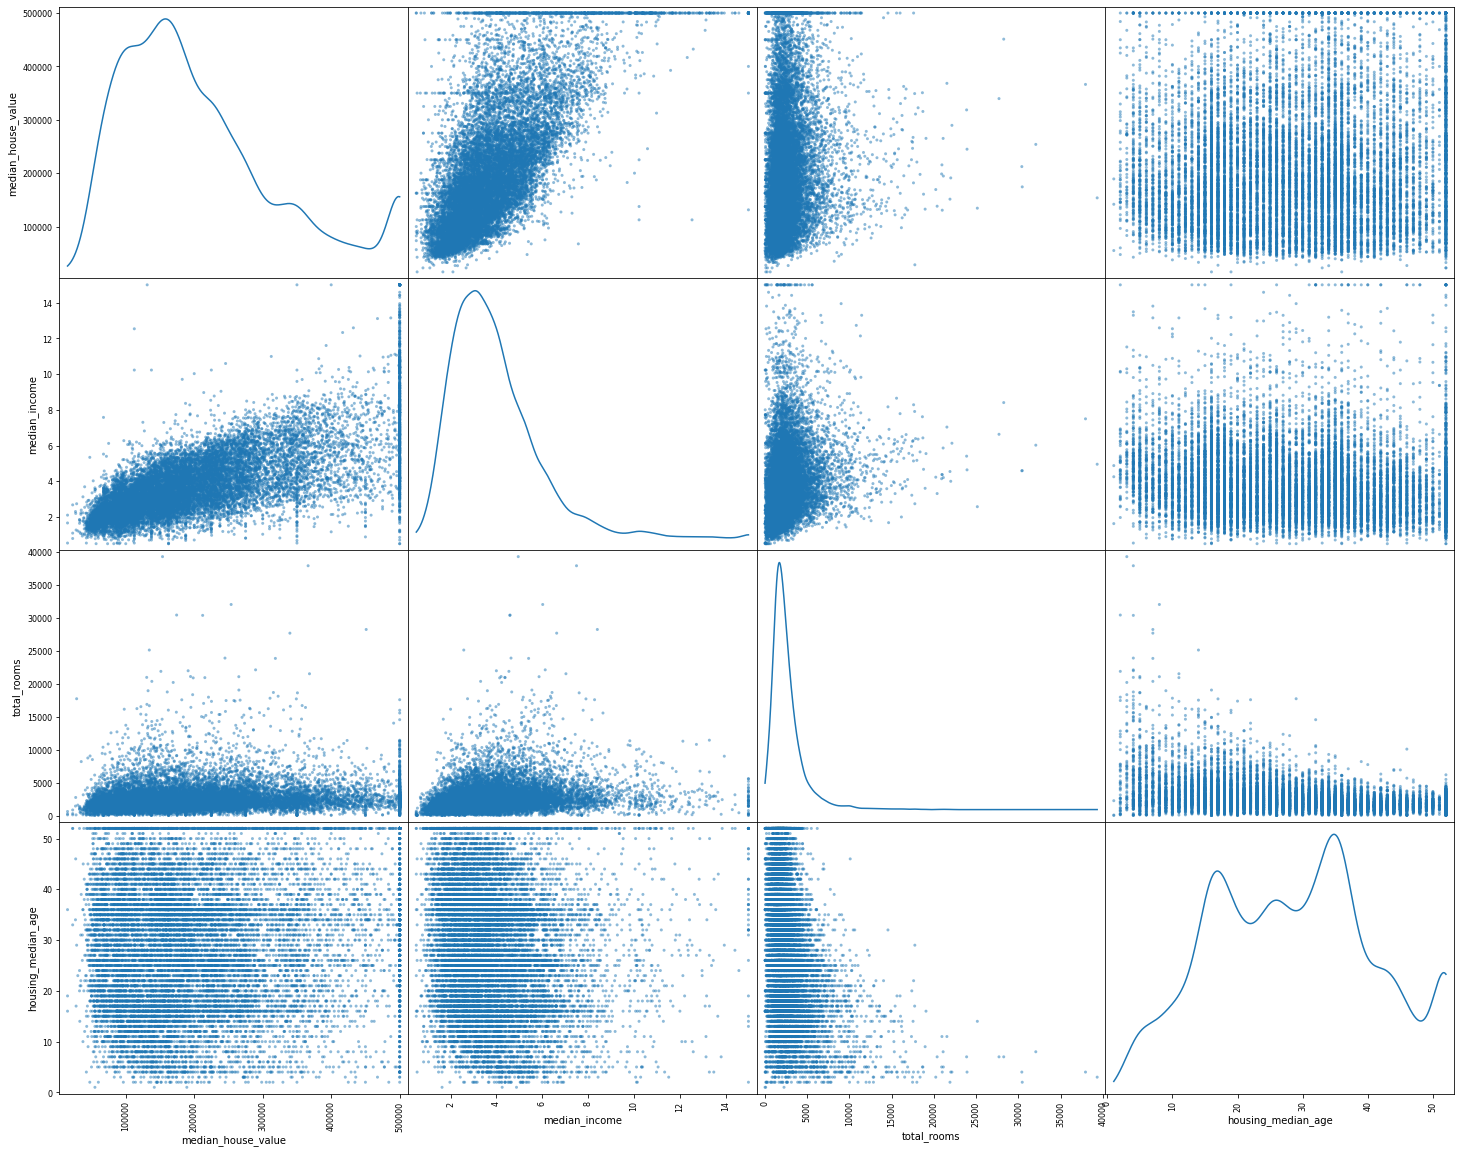

In [187]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# compare all attributes with each other in scatter matrix
scatter_matrix(strat_train_features[attributes], figsize=(25, 20), diagonal="kde")

<Axes: xlabel='median_income', ylabel='median_house_value'>

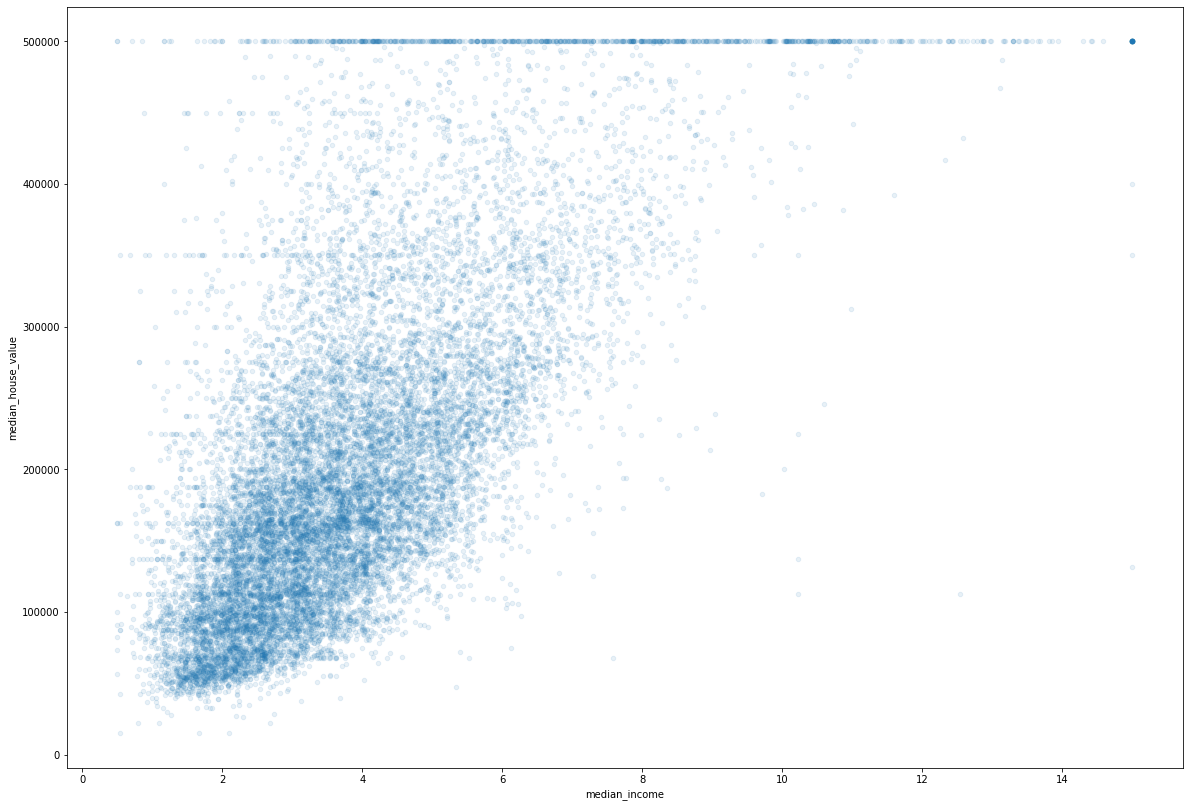

In [188]:
# the most promising correlation is house value vs income, lets plot it
strat_train_features.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1,
    figsize=(20, 14)
)

In [189]:
# return only 1 column
housing_features_categorical = strat_train_features[["ocean_proximity"]]

# number of elements returned by head
housing_features_categorical.head(7)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN


In [190]:
# experiment more with correlations. Create more custom attributes (columns in dataset) and check their correlations

strat_train_features["rooms_per_household"] \
    = strat_train_features["total_rooms"] / strat_train_features["households"]

strat_train_features["bedrooms_per_room"] \
    = strat_train_features["total_bedrooms"] / strat_train_features["total_rooms"]

strat_train_features["population_per_household"] \
    = strat_train_features["population"] / strat_train_features["households"]

# check correlations again with custom inputs
corr_matrix = strat_train_features.drop("ocean_proximity", axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# PREPARE DATA FOR ML ALGORITHMS & DATA CLEANING

In [191]:
strat_train_features = strat_train_set.drop("median_house_value", axis=1)
strat_train_labels = strat_train_set["median_house_value"].copy()

In [192]:
# see that we still have missing values in total bedrooms
strat_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [193]:
strat_train_features["total_bedrooms"].median()

433.0

In [194]:
# options to get rid of missing values
# 3 options:

# option 1 (drop missing values)
strat_train_features.dropna(subset=["total_bedrooms"])

# option 2 (drop whole column, axis=1 means column)
strat_train_features.drop("total_bedrooms", axis=1)

# get median value
median = strat_train_features["total_bedrooms"].median()

# replace missing values with median
strat_train_features["total_bedrooms"].fillna(median, inplace=True)


In [195]:
# now we have no missing values in total bedrooms
strat_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [196]:
# let's apply median to all columns with missing values using simple imputer below
# it is actually need for only one column in this dataset, but it is good to know how to do it for all columns
# total bedrooms is the only column with missing values
housing_features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [197]:
# you can use simple imputer to compute median for each column. This is already implemented in sklearn and ready to use
# works only on columns with number (rest has to be dropped)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# drop a column which is not numeric
housing_features_numeric = strat_train_features.drop("ocean_proximity", axis=1)

# fit computes medians on all columns in dataset. Seems that it also applies median to all columns in a given dataset (I thought that you have to use transform to apply it)
imputer.fit(housing_features_numeric)

# return mean for each column in dataframe (the same 2 outputs)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [198]:
# see that if we use median we get the same values for each column also as above with imputer.statistics. (Use .values to return it in an array)
housing_features_numeric.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [199]:
# now the dataset has no missing values
housing_features_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [200]:
# with transform create a numpy array which will have filled all na values with median of corresponding column
# as explained above it seems that fit also applies median to all columns in a given dataset, no need to use transform. But it seems that you can create a new dataset with median applied to all columns with missing values.  (probably the safest way is to use fit_transform??)
# create a new numpy array
X = imputer.transform(housing_features_numeric)
X.shape

(16512, 8)

In [201]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [202]:
# create a new dataset (with numpy array) from above
housing_transformed = pd.DataFrame(
    X,
    columns=housing_features_numeric.columns,
    index=housing_features_numeric.index
)
housing_transformed.median()
# you can check above before any missing values were filled with median that dataset with features has also 433 as a median value for total bedrooms. Now once the n/a values are filled with median, the overall median must be still the same, which is the case.

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [203]:
# convert categorical text to numbers
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_features_categorical)

# this is now numpy array containing numbers for each category instead of text.
# but in practise you rather want to use one-hot encoding because this ordinal encoding with values like from 0 to 4 will be interpreted as values with some order, meaning values/classes closer to each other will be considered more similar than values/classes further away from each other. This is not the case with ocean proximity (for "example 1h<" ocean is closer to "near ocean" not "inland"), so one-hot encoding is better.
housing_cat_encoded


array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [204]:
# you can check the categories:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [205]:
# one hot encode categorical attributes
# note: if there are a lot of categories, one hot encoding will create a lot of new columns, which will slow down the training and degrade performance. In this case you can replace the categorical input with useful numerical features related to the categories. For example, you can replace ocean proximity with distance to the ocean...etc.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_car_1hot = cat_encoder.fit_transform(housing_features_categorical)
housing_car_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

![images/cross_validation.png](../images/one_hot_encoding.png)



# CUSTOM TRANSFORMER
This transformer was provided by book.


In [206]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_index, bedrooms_index, population_index, households_index = 3, 4, 5, 6


# if you want to create a custom transformer which will work fine with scikit learn, you have to create a class which inherits from BaseEstimator and TransformerMixin and implement fit and transform methods. The fit_transform if implemented already in TransformerMixin so no need to implement it again.

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    """
    custom transformer to add extra attributes to the dataset
    """

    def __init__(self, add_bedrooms_per_room=True):  # no *args, **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        """
        Add extra attributes (meaning add new columns with data) to the dataset.
        
        :param X: original dataset
        :return: numpy dataset with extra attributes
        """

        # compute new attributes (features)
        rooms_per_household = X[:, rooms_index] / X[:, households_index]
        population_per_household = X[:, population_index] / X[:, households_index]

        # np.c_ - concatenate along second axis. This means that new columns will be added to the dataset
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_index] / X[:, rooms_index]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(strat_train_features.values)

# print out first row of the dataset, see that now we have extra two columns
housing_extra_attribs[0]

array([-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
       'INLAND', 5.485835694050992, 3.168555240793201], dtype=object)

# FEATURE SCALING:
#### NORMALIZATION
Shift everything into range 0-1
Often neural networks require normalization (values between 0-1)

#### STANDARDISATION
Put everything into range which has mean 0.
Less affected by outliers 

#### TRANSFORMATION PIPELINES
Sklearn has transformation pipeline to offer some help with transforming data.
All workflow steps of transforming data. It is good to automate this process because it is easy to forget some steps or to do them in wrong order.

----
ML algorithms don't perform well when the input numerical attributes have very different scales. This is the case for the housing dataset: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.

----


In [207]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# See we can now combine an execution of multiple steps into one pipeline. Simple imputer will fill missing values with median, then we will add extra attributes to the dataset, and then we will scale the dataset.
# The constructor in pipeline takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a fit_transform() method). The names can be anything you like.
# When you call the pipeline’s fit() method, it calls fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it just calls the fit() method.
# The pipeline exposes the same methods as the final estimator. In this example, the last estimator is a StandardScaler, which is a transformer, so the pipeline has a transform() method that applies all the transforms to the data in sequence (and of course also a fit_transform() method, which is the one we used.)
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

housing_num_tr = numeric_pipeline.fit_transform(housing_features_numeric)
type(housing_num_tr)

numpy.ndarray

In [208]:
from sklearn.compose import ColumnTransformer

# In combine previous pipeline with one-hot encoding step. This will create a pipeline which will first transform numerical attributes, and then it will add one hot encoding to the dataset.

# get names of numerical attributes
numeric_attributes = list(housing_features_numeric)

# name of categorical attributes
cat_attribs = ["ocean_proximity"]

# input into the ColumnTransformer constructor a tuple where:
# (name_of_transformer, transformer, list_of_column_names_to_be_transformed)
# By default, the remaining columns (i.e., the ones that were not listed) will be dropped, but you can set remainder='passthrough' to passthrough them (directly to the output array)
full_pipeline = ColumnTransformer([
    ("num", numeric_pipeline, numeric_attributes),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_features_prepared = full_pipeline.fit_transform(strat_train_features)

print(numeric_attributes)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


# SELECT, TRAIN AND EVALUATE MODEL

In [209]:
strat_train_features.iloc[:1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND


#### LINEAR REGRESSION

In [210]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(housing_features_prepared, strat_train_labels)

# predict on first 4 rows from features
prediction_from_linear_regr = linear_regressor.predict(housing_features_prepared[:4])
print("Predictions: ", prediction_from_linear_regr)

# print first 4 labels
first_four_labels = list(strat_train_labels.iloc[:4])
print("Labels: ", first_four_labels)

# predictions vs labels will have some difference

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0]


In [211]:
# measure RMSE (RMSE explained in this repository in a dedicated file)
from sklearn.metrics import mean_squared_error

linear_regression_model_mse = mean_squared_error(first_four_labels, prediction_from_linear_regr)
linear_regression_model_rmse = np.sqrt(linear_regression_model_mse)

print("RMSE:", linear_regression_model_rmse)
#The RMSE number which use se below is a value how much off are we with prediction of median house value. Model is under-fitting a lot.

RMSE: 52632.90554823771


#### DECISION TREE REGRESSION

In [212]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(housing_features_prepared, strat_train_labels)

prediction_from_decision_tree_regr = decision_tree_regressor.predict(housing_features_prepared)
decision_tree_regresor_mse = mean_squared_error(
    strat_train_labels,
    prediction_from_decision_tree_regr
)

# compute RMSE from the square root of MSE
decision_tree_regresor_rmse = np.sqrt(
    decision_tree_regresor_mse
)

print("RMSE:", decision_tree_regresor_rmse)
# printed value will be 0, meaning model is hugely over-fitting and probably learned the data by heart

RMSE: 0.0


#### RANDOM FOREST REGRESSION


In [213]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(housing_features_prepared, strat_train_labels)

housing_predictions = random_forest_regressor.predict(housing_features_prepared)
forest_mse = mean_squared_error(strat_train_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)  # compute RMSE from the square root of MSE

print("rmse", forest_rmse, "how much dollars are we off from the range $15-500K")
# Do not be fooled with such a good result. Below in this notebook is used cross validation to evaluate the model and it performs much worse.

rmse 18778.08448741138 how much dollars are we off from the range $15-500K


#### CROSS-VALIDATION FOR BETTER EVALUATION

![images/cross_validation.png](../images/cross_validation.png)

In [214]:
from sklearn.model_selection import cross_val_score

In [215]:
def display_scores(scores_: np.ndarray):
    """
    Purpose of this function in this notebook is to display scores from cross validation.
    Into this function I only input arrays with RMSE scores. This means that 'mean' print  statement is not mean itself but it is mean of RMSE scores.
    
    """
    print("Scores:", scores_)
    print("Mean of Scores", scores_.mean())
    print("Standard deviation", scores_.std())

In [216]:
# evaluate linear regression
lin_scores = cross_val_score(
    estimator=linear_regressor,
    X=housing_features_prepared,
    y=strat_train_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

# Sklearn cross validation expects a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.
lin_rmse_scores = np.sqrt(-lin_scores, dtype=np.float32)

display_scores(lin_rmse_scores)

Scores: [71762.766 64114.992 67771.17  68635.195 66846.14  72528.04  73997.08
 68802.336 66443.29  70139.8  ]
Mean of Scores 69104.086
Standard deviation 2880.328


In [217]:
# evaluate decision tree
scores = cross_val_score(
    estimator=decision_tree_regressor,
    X=housing_features_prepared,
    y=strat_train_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
tree_rmse_scores = np.sqrt(-scores, dtype=np.float32)

# here decision tree performs even worse than linear regression (probably due to overfitting)
display_scores(tree_rmse_scores)

Scores: [71749.84  69041.18  69151.15  70597.69  71277.305 77274.375 70644.49
 72776.42  68052.69  71624.61 ]
Mean of Scores 71218.984
Standard deviation 2435.2285


In [218]:
# evaluate random forest (takes a long time to run ~6 minutes)
forest_scores = cross_val_score(
    estimator=random_forest_regressor,
    X=housing_features_prepared,
    y=strat_train_labels,
    scoring="neg_mean_squared_error", 
    cv=10
)
forest_rmse_scores = np.sqrt(-forest_scores, dtype=np.float32)

display_scores(forest_rmse_scores)

Scores: [51302.73  49197.707 46936.254 51890.992 47098.848 51859.24  52894.094
 49446.727 47965.535 54136.35 ]
Mean of Scores 50272.848
Standard deviation 2374.0789


# FINE TUNE YOUR MODELS

In [219]:
# One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.
# Instead, you should get Scikit-Learn’s GridSearchCV to search for you. All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation.
# For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor:
from sklearn.model_selection import GridSearchCV

# If you are not sure what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search, as shown in this example with the n_estimators hyperparameter).
# The param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict, then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).
# The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long time, but when it is done you can get the best combination of parameters like shown below this cell. (grid_search.best_params_)
param_grid = [
    {"n_estimators": [3, 10, 10], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

random_forest_regressor = RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_forest_regressor,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross validation
                           scoring="neg_mean_squared_error",
                           return_train_score=False)
grid_search.fit(housing_features_prepared, strat_train_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 10]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [220]:
# check what should be the best parameters after grid search
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [221]:
# check what should be the best estimator after grid search
grid_search.best_estimator_


RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [222]:
# In this cell, check what should be the best score after grid search. You can list out all the parameters and their list their scores. These are the results of computation of grid search. See that there are 18 combinations of parameters and each combination was evaluated 5 times (5-fold cross validation). So in total there were 90 rounds of training.
cv_result = grid_search.cv_results_

# with zip, you can iterate over two or more containers at once
for i, (mean_score, params) in enumerate(zip(cv_result["mean_test_score"], cv_result["params"])):
    print(f"{i}:", np.sqrt(-mean_score), params)


0: 64176.18976554506 {'max_features': 2, 'n_estimators': 3}
1: 55209.01431093007 {'max_features': 2, 'n_estimators': 10}
2: 55427.608687249114 {'max_features': 2, 'n_estimators': 10}
3: 60070.53683925813 {'max_features': 4, 'n_estimators': 3}
4: 52560.86513252077 {'max_features': 4, 'n_estimators': 10}
5: 52774.74866248613 {'max_features': 4, 'n_estimators': 10}
6: 58904.36050349963 {'max_features': 6, 'n_estimators': 3}
7: 52333.11587393245 {'max_features': 6, 'n_estimators': 10}
8: 52676.99050447532 {'max_features': 6, 'n_estimators': 10}
9: 57728.26149804137 {'max_features': 8, 'n_estimators': 3}
10: 52426.61520225664 {'max_features': 8, 'n_estimators': 10}
11: 51835.44696579242 {'max_features': 8, 'n_estimators': 10}
12: 62624.377259150206 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
13: 54423.901440873284 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
14: 59229.95814396381 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
15: 52181.93899452617 {

In [223]:
# from sklearn.model_selection import RandomizedSearchCV

# RANDOMIZED SEARCH
# The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead.
# This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
# - If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
# - You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

# ANALYSE THE BEST MODELS AND THEIR ERRORS

In [224]:
# FEATURE IMPORTANCE
# See how important each attribute (feature) is for making accurate predictions:
feature_importances = grid_search.best_estimator_.feature_importances_
for i, feature in enumerate(feature_importances):
    print(f"{i}:", feature)

0: 0.0827060779259668
1: 0.07960024594118857
2: 0.046212209321619485
3: 0.022543258550424425
4: 0.01891394342130804
5: 0.019622410198181936
6: 0.02043883288266756
7: 0.2665035807123769
8: 0.06931576756336098
9: 0.10412002825300892
10: 0.09649231816317969
11: 0.011973686402265218
12: 0.15363024070599493
13: 7.895550841666461e-05
14: 0.0031222620905255517
15: 0.0047261823595143365


In [225]:

# Let's display above importance scores next to their corresponding attribute names.
# Below, create a list which will put all feature columns together (numeric attributes, extra attributes and one hot encoded attributes)
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_hhold"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = numeric_attributes + extra_attribs + cat_one_hot_attribs

# Display these importance scores next to their corresponding attribute names:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2665035807123769, 'median_income'),
 (0.15363024070599493, 'INLAND'),
 (0.10412002825300892, 'pop_per_hhold'),
 (0.09649231816317969, 'bedrooms_per_hhold'),
 (0.0827060779259668, 'longitude'),
 (0.07960024594118857, 'latitude'),
 (0.06931576756336098, 'rooms_per_hhold'),
 (0.046212209321619485, 'housing_median_age'),
 (0.022543258550424425, 'total_rooms'),
 (0.02043883288266756, 'households'),
 (0.019622410198181936, 'population'),
 (0.01891394342130804, 'total_bedrooms'),
 (0.011973686402265218, '<1H OCEAN'),
 (0.0047261823595143365, 'NEAR OCEAN'),
 (0.0031222620905255517, 'NEAR BAY'),
 (7.895550841666461e-05, 'ISLAND')]

In [226]:
# With this information you can try to drop some of the less useful features (e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others).
# You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.).

# EVALUATE YOUR SYSTEM ON THE TEST SET

In [227]:
# Fyi, this grid search is based on random forest regressor from above.
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# There is a remark in the book to use transform method instead of fit_transform! (because we don't want to fit the test set)
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# final prediction and scoring on test set:
print(
    final_predictions,
    final_mse,
    final_rmse,
    sep="\n"
)

[489060.9 229280.  204790.  ... 324010.  252500.  224900. ]
2477742396.9509277
49776.92635098041


In [228]:
# COMPUTE 95% CONFIDENCE INTERVAL
# TODO: check what is confidence interval
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors))
        )


array([47774.22004111, 51702.11497962])

# EXTRA MATERIAL

In [229]:
# CREATE A FULL PIPELINE WHICH WILL BOTH TRANSFORM AND PREDICT
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", LinearRegression())
])

full_pipeline_with_predictor.fit(strat_train_features, strat_train_labels)
#full_pipeline_with_predictor.predict(SOME_YOUR_FEATURES)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linear', LinearRegression())])

In [230]:
#-----------------------------------------------------------------------------------------------

In [231]:
# SAVE MODEL
import joblib

my_model = full_pipeline_with_predictor
joblib.dump(my_model, "saved_models/my_model.pkl")

my_model_loaded = joblib.load("saved_models/my_model.pkl")

In [232]:
#-----------------------------------------------------------------------------------------------

In [233]:
# GRID SEARCH WITH SUPPORT VECTOR MACHINE REGRESSOR  

# !!! THIS TAKES A LONG TIME TO RUN ~36min !!!
# Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now (Explained later in the notebook series).
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = \
[
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

svm_regressor = SVR()
grid_search = GridSearchCV(
    estimator=svm_regressor,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2
)
grid_search.fit(housing_features_prepared, strat_train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   4.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.9s
[CV] END ..............................C=30.0, kernel=linear; total time=   4.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.1s
[CV] END .............................C=100.0, kernel=linear; total time=   4.9s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [234]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse
# score is similarly bad as our least successful models

70286.61835383571

In [235]:
# Check which parameters were found to be the best
# See that the best kernel is linear and the best C is 30000.0. This means that the best value for C is the highest we specified. There is a high probability that even higher values of C would result in better performance. If you have time, remove the smaller values of C and add higher values of C to the grid search and train again to see if rmse improves.
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [236]:
#-----------------------------------------------------------------------------------------------

In [237]:
# RANDOMIZED SEARCH WITH SUPPORT VECTOR MACHINE REGRESSOR  
# !!! THIS TAKES A LONG TIME TO RUN ~48min !!!
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.
# Also, I tried to visualise them little bit in cells below.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
    'kernel': ['linear', 'rbf'], 
    'C': reciprocal(20, 200000), 
    'gamma': expon(scale=1.0)
}

support_vector_machine_regressor = SVR()
randomized_search = RandomizedSearchCV(
    estimator=support_vector_machine_regressor,
    param_distributions=param_distribs,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)
randomized_search.fit(housing_features_prepared, strat_train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.8s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.8s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  10.6s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027DAFC3BE50>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027DAFC3B760>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [238]:
negative_mse = randomized_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse
# score below is much closer to our best model above

54751.69009488048

In [239]:
# Check which parameters were found to be the best.
# This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.
randomized_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

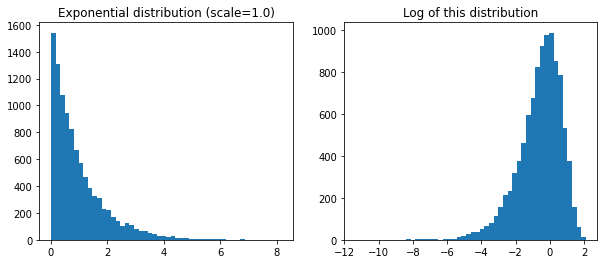

In [240]:
# DISPLAY HOW EXPONENTIAL DISTRIBUTION LOOKS LIKE
# Original cell from author's notebook. The same cell is explained below with my words.
from scipy.stats import reciprocal, expon

exponential_distribution = expon(scale=1.)
samples = exponential_distribution.rvs(size=10_000, random_state=42)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)

plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)

plt.show()

Mean of the distribution: 3.0
Minimum value of the distribution: 0.013928352199028654
Maximum value of the distribution: 24.51733679345425
Length of the distribution: 1000


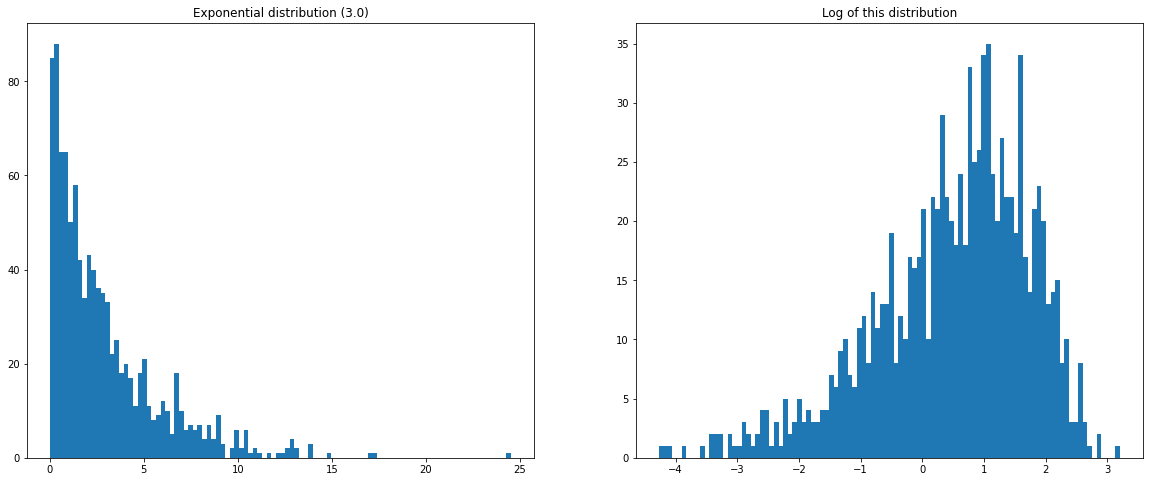

In [241]:
# This cell is an explanation of the cell above from the original author's notebook.

# This block will create 1000 samples (numbers) of exponential distribution with mean 3.
scale = 3.0 # Seems that this parameter actually results in mean of the distribution.
exponential_distribution = expon(scale=scale)
samples = exponential_distribution.rvs(size=1000, random_state=42)

plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.title(f"Exponential distribution ({scale})")
plt.hist(samples, bins=100) # bins is the number of bars in the histogram

# Visualise how would the distribution look like if we take a log of it. This is useful because if we take a log of the distribution, it will look almost like a normal/Gaussian distribution. 
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=100)

print("Mean of the distribution:", exponential_distribution.mean())
print("Minimum value of the distribution:", samples.min())
print("Maximum value of the distribution:", samples.max())
print("Number of items generated:", len(samples))

plt.show()

Mean of the distribution: 21712.55262275307
Minimum value of the distribution: 20.002143315978216
Maximum value of the distribution: 199480.6105572052
Length of the distribution: 10000


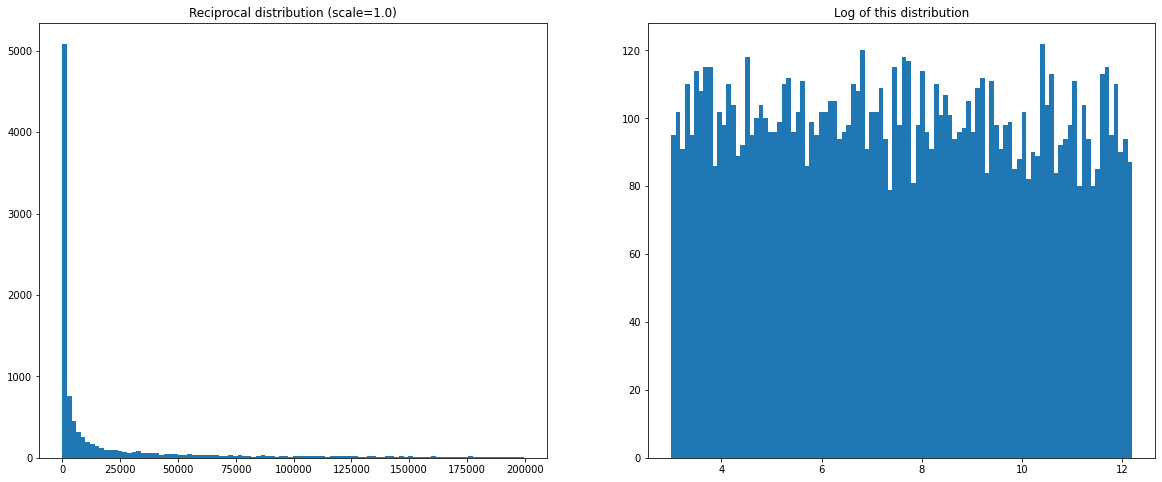

In [242]:
# DISPLAY HOW RECIPROCAL DISTRIBUTION LOOKS LIKE
reciprocal_distribution = reciprocal(
    20, # Seems this is a parameter for minimum value of the distribution
    200_000 # Seems this is a parameter for maximum value of the distribution
)

# Rest of the code is the same system as in cell above.
samples = reciprocal_distribution.rvs(size=10_000, random_state=42)

plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=100)

plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=100)

print("Mean of the distribution:", reciprocal_distribution.mean())
print("Minimum value of the distribution:", samples.min())
print("Maximum value of the distribution:", samples.max())
print("Number of items generated:", len(samples))

plt.show()

# The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

In [243]:
#-----------------------------------------------------------------------------------------------

In [244]:
# ADD A TRANSFORMER IN THE PREPARATION PIPELINE TO SELECT ONLY THE MOST IMPORTANT ATTRIBUTES.

from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    """
    Return indices of top k elements in an array.
    :param arr: Array with sorted values (descending) of feature importances. You can get such array for example with performing grid search on some estimator. Once the grid search is finished call grid_search.best_estimator_.feature_importances_ and sort the array.
    :param k: Number of indices to return. Meaning, select the top 'k' most important features.
    :return: array
    """
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [245]:
# Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a RandomForestRegressor). You may be tempted to compute them directly in the TopFeatureSelector's fit() method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

# Let's define the number of top features we want to keep:
k = 5

# Let's get the indices of the top k features. Just try the bare function itself:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [246]:
# attributes is only the list of all attributes (columns) in the dataset. This is needed to get the names of the top k features.
# top_k_feature_indices is the list of indices of the top k features. This is needed to select the top k features from the dataset.
# This means that we have a list of a bunch of column names and the code below filters only the ones based on the top_k_feature_indices array.
print("All attributes", np.array(attributes), end="\n\n")
print("Filtered attributes", np.array(attributes)[top_k_feature_indices])

All attributes ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income'
 'rooms_per_hhold' 'pop_per_hhold' 'bedrooms_per_hhold' '<1H OCEAN'
 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']

Filtered attributes ['longitude' 'median_income' 'pop_per_hhold' 'bedrooms_per_hhold' 'INLAND']


In [247]:
# Create yet another pipeline, which combines the previous full_pipeline with the new top feature selector (Do not be confused that the preparation pipeline is called full_pipeline, I would rather call it full_pipeline together with topfeatureselector, if I did not plan to add any more transformations anymore) :
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    # Note, that feature importances need to be computed in advance. Therefore, we pass already created array from previous cell above in this notebook.
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [248]:
# Create now new dataset with only top k most important features. We previously specified that we want to keep only 5 most important features and therefore we get only 5 columns in the dataset.
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(strat_train_features)

In [249]:
housing_prepared_top_k_features[0:5] # check first 5 rows

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ],
       [ 1.22173797, -0.86592882, -0.10680295,  0.96120521,  0.        ],
       [ 0.43743108,  0.32575178,  0.00610923, -0.47451338,  0.        ]])

In [250]:
# This is only comparison with previous dataset from the upper side of this notebook, that our new pipeline works. See that the values are the same as in the cell above after filtering top 5 rows and the most important feature columns.
# Note again, that code below is only manual filtering to see that the new pipeline works.
housing_features_prepared[0:5, top_k_feature_indices]

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12112176,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.81086696,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.33827252,  1.        ],
       [ 1.22173797, -0.86592882, -0.10680295,  0.96120521,  0.        ],
       [ 0.43743108,  0.32575178,  0.00610923, -0.47451338,  0.        ]])

In [251]:
#-----------------------------------------------------------------------------------------------

In [252]:
# CREATE A SINGLE PIPELINE THAT DOES THE FULL DATA PREPARATION PLUS THE FINAL PREDICTION.

# Do not be confused that the preparation pipeline is called full_pipeline, I would rather call it full_pipeline together with topfeatureselector. Nevertheless, you see that you can add multiple transformation steps and prediciton into one pipeline.
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    # The "**" operator unpacks the dictionary into the functions parameters. This means that we pass already prepared dictionary with the best parameters from randomised search from earlier.
    ('svm_reg', SVR(**randomized_search.best_params_))
])

prepare_select_and_predict_pipeline.fit(strat_train_features, strat_train_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([8.27060779e-02, 7.96002459e-02, 4.62122093e-02, 2.25432586e-02,
       1.89139434e-02, 1.96224102e-02, 2.04388329e-02, 2.66503581e-01,
       6.93157676e-02, 1.04120028e-01, 9.64923182e-02, 1.19736864e-02,
       1.53630241e-01, 7.89555084e-05, 3.12226209e-03, 4.72618236e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [253]:
# LAST SECTION (Not implemented here)
# In the last section of original notebook are explained some preparation options using GridSearchCV. The way I understand it is that in the code shown in original notebook author shows how to find, using grid search:   
#   1. the optimal strategy for replacing missing values in the dataset. 
#   2. how many features are actually relevant
# I might be wrong about what I wrote in this cell. If you want to know more checkout the original document, and spend some more time with it ↓
# Last chapter 5 in extra materials on the botom of notebook: 
# https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb